# Iris Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
import seaborn as sns

from ibex import trans
from ibex.sklearn import linear_model as pd_linear_model
from ibex.sklearn import decomposition as pd_decomposition
from ibex.sklearn import preprocessing as pd_preprocessing
from ibex.sklearn import ensemble as pd_ensemble

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()
features = iris['feature_names']
iris = pd.DataFrame(
    np.c_[iris['data'], iris['target']], 
    columns=features+['class'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
iris, iris_te = model_selection.train_test_split(iris, stratify=iris['class'], test_size=0.1)
iris.reset_index(inplace=True)
iris_te.reset_index(inplace=True)

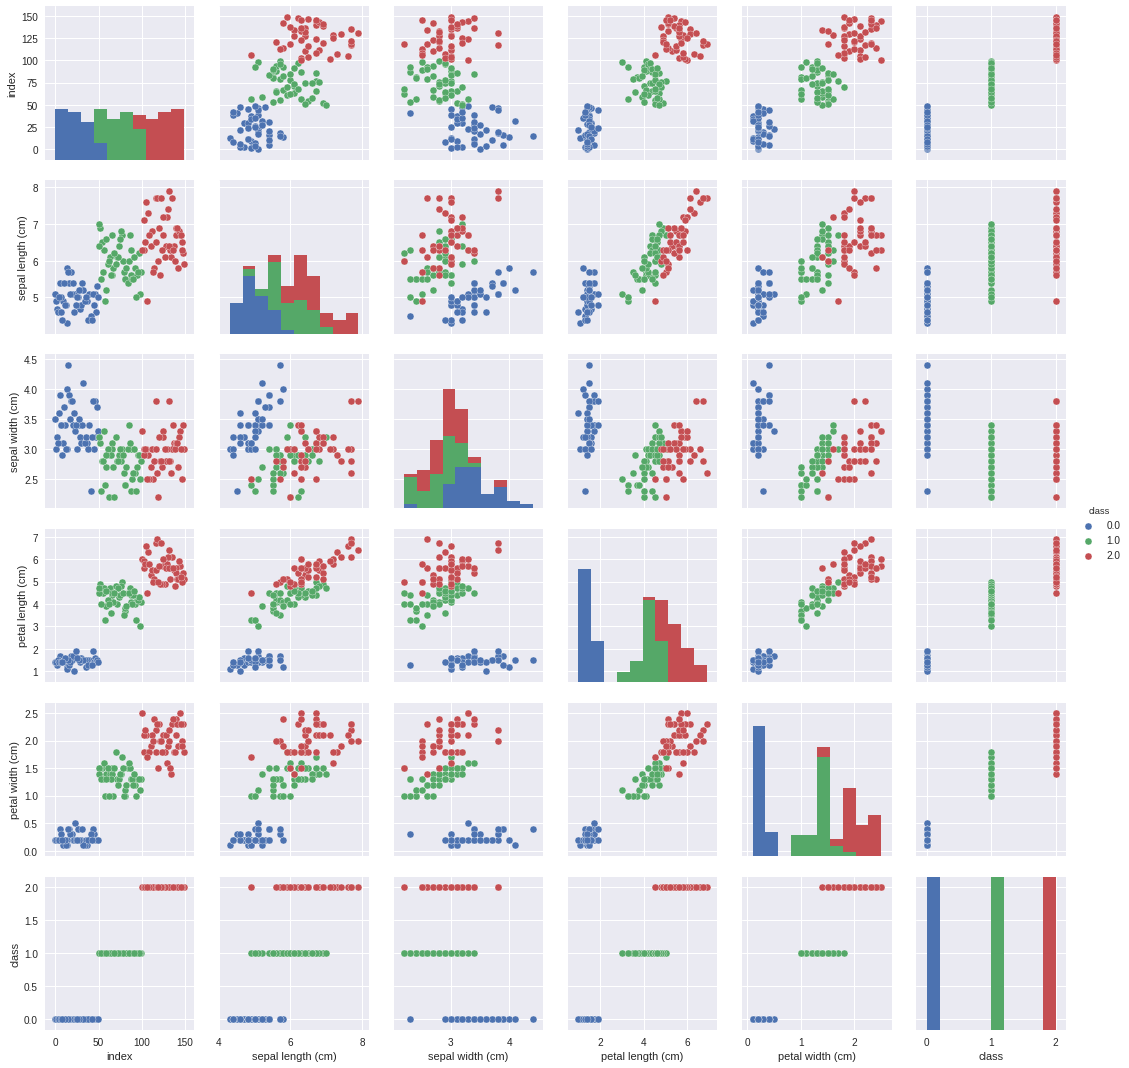

In [4]:
sns.pairplot(iris, 'class');

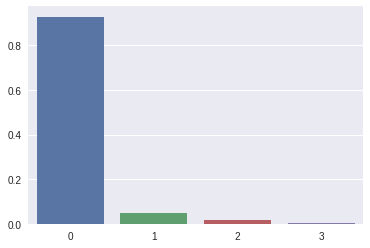

In [5]:
sns.barplot(
    data=pd.DataFrame(pd_decomposition.PCA().fit(iris[features]).explained_variance_ratio_).T);

In [6]:
decomp = trans(
    {('pc1', 'pc2'): pd_decomposition.PCA(n_components=2)}, 
    columns=features)

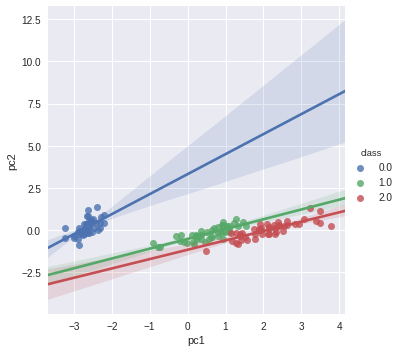

In [7]:
pca = decomp.fit_transform(iris)
pca['class'] = iris['class']
sns.lmplot('pc1', 'pc2', data=pca, hue='class');

In [8]:
clf = decomp | pd_linear_model.LogisticRegression()
clf

Pipeline(steps=[('_functiontransformer', <ibex._function_transformer._FunctionTransformer object at 0x7fecad228470>), ('_adapter', _Adapter(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
     penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
     verbose=0, warm_start=False))])

In [9]:
scores = model_selection.cross_val_score(
    clf,
    X=iris,
    y=iris['class'],
    cv=10)
sns.boxplot(x=scores, orient='v');

AttributeError: '_Adapter' object has no attribute '_FrameMixin__cols'

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier()
scores = model_selection.cross_val_score(
    clf,
    X=iris,
    y=iris['class'],
    cv=10)
sns.boxplot(x=scores, orient='v');